# JSC270 Lab 6 Part I: Intro to Numpy


## Contents

1. What is numpy?
2. Creating and Reshaping Numpy arrays:
  - From scratch
  - From other python data types (pandas df)
  - from external data (e.g csv files)
  - From standard python functions
3. Some basic operations:
  - Add, subtract, multiply, divide
  - mean, median, variance, sd
  - Transpose, inverse, dot product
4. Vectorization and Broadcasting
5. Random number generation
6. Linear regression example (time permitting)



# __1. What is Numpy?__

- For the first part of today's tutorial, we'll be discussing `numpy`, one of the most widely-used python libraries in the data science / ML community 

- __NumPy__ is a scientific computing library designed to optimize performance (base code is written in C)

- It contains functions for dealing with almost every common mathematical operation, as well as linear algebra operations and random number generation

- Its syntax is very user-friendly, and the base code is open-source: [see the website](https://numpy.org/)

- Its fundamental data structure is the array (it can handle dimensions well beyond 3)

- Numpy is a key package for data science!

## The NumPy array

- An array in this case is exactly what you might think - a grid of values

- A matrix, for example, is 2D array (most of what we do will use matrices)

- Numpy arrays can take most of the common python data types (integers, floats, strings, objects, etc.).....

- But within an array, every element must be the same data type

- Thus numpy is more commonly used for numerical data (though you can use categorical information)

- Just like `pandas` dataframes, numpy arrays are indexed by non-negative integers (0, 1, 2, ...)

- The __shape__ of an array is given by an ordered tuple (more on this shortly)

 $\ \ A =
 \begin{pmatrix}
  2 \\
  0 \\
  5 \\
  1
 \end{pmatrix}_{(4,1)} \
 B = \begin{pmatrix}
  2 & 2 & 5\\
  0 & 0 & 1
 \end{pmatrix}_{(2,3)}$

<br>

# __2. Creating and Reshaping NumPy Arrays__

<br>

<br>

- There are many different ways to create a numpy array:



In [ ]:
# The abbreviation np is very common
import numpy as np

###__We can convert other python data structures__

In [ ]:
# define a list and convert
my_list = [2,3,6,7]
my_array = np.array(my_list)

print(my_list)
print(my_array)
print('The first object is type {}\nwhile the second object is type {}'.format(type(my_list),type(my_array)))
print('The data within the array object is type',my_array.dtype)

[2, 3, 6, 7]
[2 3 6 7]
The first object is type <class 'list'>
while the second object is type <class 'numpy.ndarray'>
The data within the array object is type int64


Notice the difference in formatting (elements in a numpy array (in print statement) are separated by spaces, not commas). Notice also the difference in data type.
- Note that the type (class) of the array object is different from the type of data it holds

Similarly, I could use nested lists to define an array in 2 dimensions

In [ ]:
my_larger_list = [[2,3,6,7],[1,6,8,9]]
my_larger_array = np.array(my_larger_list)

print(my_larger_array)

[[2 3 6 7]
 [1 6 8 9]]


__Q: What is the shape of this array?__ 

<br>

<br>

When you have a numpy array, you can always find the shape using the `shape()` function (which is sliceable). 

In [ ]:
# Find the shape of the array


But the argument needn't be a list:

In [ ]:
my_nested_tuple = ((1,4,3,6),(2,2,2,2))
my_array = np.array(my_nested_tuple)

print(my_array)
print(my_array.shape)

[[1 4 3 6]
 [2 2 2 2]]
(2, 4)


Numpy can even (to a certain extent)  handle mixed data types automatically:

In [ ]:
my_list_with_tuples = [[(2,3,4),(4,5,6),(7,5,4)],[[2,4,7],[1,1,1],[0,0,1]]]
my_array = np.array(my_list_with_tuples)

print(my_array)

[[[2 3 4]
  [4 5 6]
  [7 5 4]]

 [[2 4 7]
  [1 1 1]
  [0 0 1]]]


__Q: What is the shape of this array?__ 

<br>

Notice that in creating the array, numpy works its way from the top of the nesting structure down (not the other way).

In [ ]:
# Shape of the array


<br>

<br>

###__We can create some types of matrices using standard numpy functions__

In [ ]:
array_of_zeros = np.zeros((3,4))
print('Array of zeros:\n',array_of_zeros)
# Very useful for initializing parameter matrices for numerical optimization (e.g. neural nets)

array_of_ones = np.ones((2,2))
print('Array of ones:\n',array_of_ones)

identity_matrix = np.eye(5)
print('Identity Matrix:\n',identity_matrix)
# Useful for adding noise to avoid numerical instability

# Create arrays with regular increments as values
equally_spaced_array = np.arange(start=5,stop=11, step=0.5, dtype=float)
print('Note the equal spacing:\n',equally_spaced_array)

# Similar function, but you can control the number of points more easily
spaced_10_points = np.linspace(num=10,start=100,stop=200,dtype=int)
print('Better control over the number of points:\n',spaced_10_points)

# These last two functions are very useful for defining grids of hyperparameter values
# Also useful for plotting discrete approximations to continuous functions

Array of zeros:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Array of ones:
 [[1. 1.]
 [1. 1.]]
Identity Matrix:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Note the equal spacing:
 [ 5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5]
Better control over the number of points:
 [100 111 122 133 144 155 166 177 188 200]


Although I will not show it here, the pandas function `to_array()` converts pandas dfs to numpy arrays. Similarly, you could use the pandas `DataFrame()` function to convert back.

<br>

<br>

### __We can read in external data__
- Note this is probably the most underdeveloped part of `numpy`. It is more common to load and clean the data with other packages (e.g. `pandas`), before converting to a numpy array.

In [ ]:
# Let's read in some csv data
from io import StringIO

csv_raw = '''2,3,4\n
5,6,8\n
0,0,1\n
4,4,4
'''
csv_converted = StringIO(csv_raw)

# Note that the genfromtxt function could just as easily 
# Accept a filepath instead of a string

my_csv_array = np.genfromtxt(csv_converted, delimiter=",")
print('New array:\n',my_csv_array)

New array:
 [[2. 3. 4.]
 [5. 6. 8.]
 [0. 0. 1.]
 [4. 4. 4.]]


<br>

<br>

### __We can also just create an array from scratch__

In [ ]:
row_from_scratch = np.array([2,1,4,8])
print('Row vector: ',row_from_scratch)

col_from_scratch = np.array([[2],[1],[4],[8]])
print('Column vector: ',col_from_scratch)

matrix_from_scratch = np.array([[2,1],[4,8]])
print('Matrix:\n',matrix_from_scratch)

Row vector:  [2 1 4 8]
Column vector:  [[2]
 [1]
 [4]
 [8]]
Matrix:
 [[2 1]
 [4 8]]


<br>

__Q: What is the shape of `row_from_scratch`?__  The answer might surprise you...

In [ ]:
# Answer question below



<br>

<br>

__Warning__: When initiating numpy arrays in more than 1 dimension, numpy will only add additional indices if it needs to (ie if there really is > 1 dimensions). 
- This can be a problem for matrix multiplication ( ie. you might think multiplying (4,) x (1,4) should yield a 4 x 4 matrix, but numpy will throw an error)
- So how to fix this?

<br>

<br>

## __Reshaping and Slicing__

- We can use the `reshape()` function to change the shape of our arrays
- Since this function is pure, we'll have to use reassignment to make the changes permanent
- Note that the number of elements in the old shape must equal those in the new shape (or numpy will throw an error)

In [ ]:
# Recall our row vector above
print('Old shape:',row_from_scratch.shape)
row_from_scratch = np.reshape(row_from_scratch, newshape=(4,1))
print('New shape:',row_from_scratch.shape)
print(row_from_scratch)

# Let's create a new matrix with the same elements
new_matrix = np.reshape(row_from_scratch, newshape = (2,2))
print('New matrix:\n',new_matrix)


Old shape: (4,)
New shape: (4, 1)
[[2]
 [1]
 [4]
 [8]]
New matrix:
 [[2 1]
 [4 8]]


- Note how the elements were placed in the matrix (left to right, top to bottom)

<br>

<br>

### Slicing

In numpy, each dimension of an array gets its own index.
- To extract subsets of an array (also called slicing), we need to specify values for each index/dimension
- The order of indices when slices follows the order of the array shape
- For example, suppose I wanted the following:

In [ ]:
# Remember python is zero-indexed

# First 2 rows of row_from_scratch (only 2 data points)
print(row_from_scratch[0:2,:])

print('--------')

# Last 2 rows of row_from_scratch (shape 4x1)
print(row_from_scratch[-2:,:])

print('--------')

# First column of new matrix (shape 2x2)
print(new_matrix[:,0])

[[2]
 [1]]
--------
[[4]
 [8]]
--------
[2 4]


This is very similar to slicing in `pandas`. You can also use conditioning:

In [ ]:
binary_matrix = (new_matrix > 3).astype(float)
print(binary_matrix)

# You probably don't want to work with boolean values
# The astype() changes boolean to float

[[0. 0.]
 [1. 1.]]


<br>

__Q: How would I obtain a binary vector based on `row_from_scratch` whose elements are 1 if `row_from_scratch > 4` and 0 if not?__ 

In [ ]:
# Answer question below



<br>

<br>

# __3. Some Basic Operations__

- Numpy provides built-in functions that let you compute most popular summary statistics
- Moreover, since numpy arrays can have more than one dimension, these functions let you specify on which dimension to apply the calculation
- Many of these are nearly identical to their `pandas` counterparts

In [ ]:
# Let's generate a numpy array to work with
sample_array = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(sample_array)

# Take the mean of the entire array
print('Mean of whole array\n',np.mean(sample_array))

# Take the mean of each row

# Note that the axis param denotes the direction 
# along which the computation is done (0 = column, 1 = row)
print('Row-wise means\n',np.mean(sample_array, axis=1))

# Take the mean of each column
print('Column-wise means\n',np.mean(sample_array, axis=0))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Mean of whole array
 5.0
Row-wise means
 [2. 5. 8.]
Column-wise means
 [4. 5. 6.]


Other functions take similar parameters:

In [ ]:
# Standard deviation (Column-wise) 
print('Columnwise St Dev:',np.std(sample_array, axis=0))

# Variance (Entire array)
print('Variance:',np.var(sample_array))

# Median (Row-wise)
print('Row-wise Median:',np.median(sample_array, axis=1))

# Min (Entire array)
print('Minimum:',np.min(sample_array))

Columnwise St Dev: [2.44948974 2.44948974 2.44948974]
Variance: 6.666666666666667
Row-wise Median: [2. 5. 8.]
Minimum: 1


<br>

__Q: How would I obtain the maximum value in each column of `sample_array`?__ Please type your answer into the chat.


In [ ]:
# Answer question below


<br>

<br>

The code above was for operations _on a single array_. `numpy` also has a number of useful operations defined for _multiple arrays_.

- To show these, let's define a few new arrays:

In [ ]:
# Generate some new matrices
a = np.array([[1,1,1],[2,2,2],[3,3,3]])
b = np.array([[2,0,0],[0,2,0],[0,0,2]])
c = np.array([1,1,1])
c = np.reshape(c,newshape=(3,1))

print('Matrix A:\n',a)
print('Shape of A:',a.shape)

print('Matrix B:\n',b)
print('Shape of B:',b.shape)

print('Matrix C:\n',c)
print('Shape of C:',c.shape)

Matrix A:
 [[1 1 1]
 [2 2 2]
 [3 3 3]]
Shape of A: (3, 3)
Matrix B:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]
Shape of B: (3, 3)
Matrix C:
 [[1]
 [1]
 [1]]
Shape of C: (3, 1)


I can combine the above arrays in several different ways using standard numpy functions

In [ ]:
# Element-wise Addition
print('A + B\n',np.add(a,b))

# Element-wise Subtraction
print('A - B\n',np.subtract(a,b))

# Element-wise Multiplication
print('A x B\n',np.multiply(a,b))

# Element-wise Multiplication
print('A / B\n',np.divide(a,b))

A + B
 [[3 1 1]
 [2 4 2]
 [3 3 5]]
A - B
 [[-1  1  1]
 [ 2  0  2]
 [ 3  3  1]]
A x B
 [[2 0 0]
 [0 4 0]
 [0 0 6]]
A / B
 [[0.5 inf inf]
 [inf 1.  inf]
 [inf inf 1.5]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


NumPy also has built in functions for most of the linear algebra operations you might have computed/coded by hand:

In [ ]:
# Transpose
print('Transpose of A:\n', a.T)

# Inverse
print('Inverse of B:\n', np.linalg.inv(b))

# Dot/Inner product
print('Inner product AB\n',np.dot(a,b))

Transpose of A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Inverse of B:
 [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
Inner product AB
 [[2 2 2]
 [4 4 4]
 [6 6 6]]


<br>

__Q: What would happen if I tried to find $A C^{T}$? Why?__ Please type your answer into the chat. Hint: Go back and look at their shapes above...

In [ ]:
# Answer question below



<br>

<br>

<br>

# __4. Vectorization and Broadcasting__
- At this point, you might be wondering why you should care
- Why is it a big deal if I can find the inner product of two matrices?
- Consider what we would have to do if we didn't have `numpy`

In [ ]:
# Inner Product using python lists

c = [1,1,1,1,1,1]
d = [2,2,2,2,2,2]

# Using for loops
innprod = 0
for i in range(len(c)):
    innprod += c[i]*d[i]
print('Dot product the old-fashioned way:',innprod) 

# Elementwise addition with python lists
new_list = []
for i in range(len(c)):
  s = c[i] + d[i]
  new_list.append(s)
print('Elementwise sum the old-fashioned way:',new_list)

# Imagine how crazy this would be if C, D were matrices instead of vectors!!


## Using numpy
c_array,d_array = np.array(c),np.array(d)
print('The much faster numpy dot product:',np.dot(c_array,d_array))

print('The much better/faster elementwise sum:', c_array + d_array)


Dot product the old-fashioned way: 12
Elementwise sum the old-fashioned way: [3, 3, 3, 3, 3, 3]
The much faster numpy dot product: 12
The much better/faster elementwise sum: [3 3 3 3 3 3]


## Vectorization

Most of `numpy` is written in the array programming style called __vectorization__, where functions are designed to act on entire arrays instead of individual elements within them
- This makes the code much more elegant and easy to write/read
- Also, numpy functions are optimized for speed, and in larger arrays, using the for-loop approach will cost a lot of time 
- Notice on the last example above, I didn't even need to use `np.sum()`, since C and D were the same shape
- Numpy allows you to go straight from algebraic solutions to code (more on this in the last section)

<br>

<br>

## Broadcasting
- Recall the matrices we generated earlier:

In [ ]:
# Generate some new matrices
a = np.array([[1,1,1],[2,2,2],[3,3,3]])
b = np.array([[2,0,0],[0,2,0],[0,0,2]])
c = np.array([1,1,1])
c = np.reshape(c,newshape=(3,1))

print('Matrix A:\n',a)
print('Shape of A:',a.shape)

print('Matrix B:\n',b)
print('Shape of B:',b.shape)

print('Matrix C:\n',c)
print('Shape of C:',c.shape)

Matrix A:
 [[1 1 1]
 [2 2 2]
 [3 3 3]]
Shape of A: (3, 3)
Matrix B:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]
Shape of B: (3, 3)
Matrix C:
 [[1]
 [1]
 [1]]
Shape of C: (3, 1)


Remember the dot product was not always defined. But what if wanted to do something much simpler than the dot product? What if I wanted to add c to each column of A?

In [ ]:
a + c

array([[2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

- All I had to do here was use a simple summation, and numpy knew what I was trying to do
- For simple arithmetic operations (+,-,x,/), numpy will stretch or copy the matrix that is traditionally too small until it reaches a shape that makes the operation feasible
- Typically the smaller array is __broadcast__ across the larger one
- Doing this avoids unnecessary copying of vectors/matrices, which frees up memory

__Some Broadcasting Rules__

i. Broadcasting is only done between two arrays (at a time)

ii. Numpy compares two arrays by evaluating their shapes (tuples) from right to left

iii. A pair of dimensions (corresponding elements in the shape tuple) can only be broadcast if:
- Both elements are the same _or_
- One of the elements is 1

In other words, the larger array must be greater than or equal to the smaller array in every dimension

<br>

Some examples:

$A + C^{T} = \begin{pmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{pmatrix} + \begin{pmatrix}
1 & 1 & 1
\end{pmatrix} \Rightarrow$ (Broadcast) $\Rightarrow \begin{pmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{pmatrix} + \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{pmatrix} = \begin{pmatrix}
2 & 2 & 2 \\
3 & 3 & 3 \\
4 & 4 & 4 
\end{pmatrix}$

- Comparing (3,3) and (1,3) from right to left:
  - In the first comparison, both elements are equal
  - In the second comparison, the second element is 1
- Since both conditions are met, broadcasting works

In [ ]:
# Adding A and C_transpose ((3,3) + (1,3))
print('A + C_transpose:\n', a + c.T)

A + C_transpose:
 [[2 2 2]
 [3 3 3]
 [4 4 4]]


Also works for scalars:

$A + 2C = \begin{pmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{pmatrix} + \begin{pmatrix}
2 \\ 2 \\ 2
\end{pmatrix} \Rightarrow$ (Broadcast) $\Rightarrow \begin{pmatrix}
1 & 1 & 1 \\
2 & 2 & 2 \\
3 & 3 & 3
\end{pmatrix} + \begin{pmatrix}
2 & 2 & 2 \\
2 & 2 & 2 \\
2 & 2 & 2 
\end{pmatrix} = \begin{pmatrix}
3 & 3 & 3 \\
4 & 4 & 4 \\
5 & 5 & 5 
\end{pmatrix}$

In [ ]:
a + 2*c

array([[3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])

This also works, for the same reason above
- Technically this was 2 broadcasts (one for scalar multiplication on C, and one for addition)

<br>

__Q: Suppose I define the new array E , shown below. (Go ahead a run the cell) Would broadcasting successfully allow me to find A + E? Why or why not?__ Hint: remember our two conditions earlier.

In [ ]:

e = np.array([[2,2],[3,3],[4,4]])
print('E:\n',e)
print('Shape of E:', e.shape)
print('A:\n',a)
print('Shape of A:', a.shape)

E:
 [[2 2]
 [3 3]
 [4 4]]
Shape of E: (3, 2)
A:
 [[1 1 1]
 [2 2 2]
 [3 3 3]]
Shape of A: (3, 3)


In [ ]:
# Answer question below


<br>

<br>

<br>

# __5. Random Number Generation__
- In addition to the creation functions shown earlier, `numpy` also allows for very easy random number generation. Here are a few examples:


In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Generate a sample of 10 from a standard normal density
rand_norm_sample = np.random.normal(0,1,size=10)
print('Standard Normal Sample:',rand_norm_sample)

# Generate a sample of 2 from a Beta(1,1) density
rand_beta_sample = np.random.beta(1,1, size=10)
print('\nBeta(1,1) Sample:',rand_beta_sample)

# Generate a random categorical variable
rand_cat = np.random.choice(['A','B','C'],size = 10)
print('\nRandom Categorical Sample:',rand_cat)

Standard Normal Sample: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]

Beta(1,1) Sample: [0.4978376  0.36699967 0.59729045 0.81434157 0.44364733 0.27969111
 0.92729229 0.78083675 0.7572072  0.19772398]

Random Categorical Sample: ['C' 'C' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'B']


<br>

<br>

<br>

# __QUESTIONS? (About anything)__

Let's take a 5 min break before part II....

<br>

<br>

# __6. Linear Regression Example__
- To showcase the power of `numpy`, I've simulated some data and fit a linear regression model (mostly from scratch).
- The dataset consists of 100 observations that follow the following relationship: $y_i = f(x_i) + \epsilon_i$
- In this case:
    - $x_i$ are IID from a $Unif(-50,50)$ distribution
    - $\epsilon_i$ are IID from $N(\mu = 0, \sigma = 3)$
    - $f(x) = sin(2\pi x) + x  + \epsilon$ (in vector notation)
- Obviously linear regression is not the best choice of model here, but it does have a closed form solution:
    - If I assume a model of $y = X\beta + \epsilon$
    - Then the OLS solution is $\hat{\beta} = (X^T X)^{-1} X^T y$, which is closed form, and can be computed easily in numpy

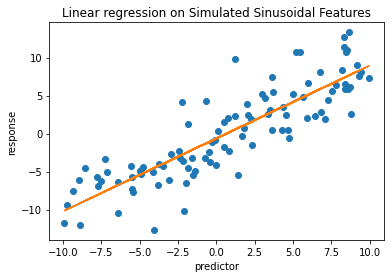

In [ ]:
np.random.seed(50)

# Simulate the data
def simulate_data(sample_size):
  # Generate features
  x = np.random.uniform(-10,10,size=sample_size)
  x = np.reshape(x,newshape=(sample_size,1))
  # print('shape of x:',x.shape)
  # Generate errors
  eps = np.random.normal(0,3,size = sample_size)
  eps = np.reshape(eps, newshape=(sample_size,1))
  # print('shape of eps:',eps.shape)
  # Generate response (including error)
  y = np.sin(2*np.pi*x) + x + eps

  # Add leading column of ones for intercept
  lead_ones = np.ones((sample_size,1))
  
  X = np.concatenate([lead_ones,x],axis=1) 
  # Note that cap x is different from lower x
  # print(X.shape)
  # print(y.shape)
  return X,y

def LinearRegression(data):
  '''
  A function that performs linear regression, returning
  useful information
  input: data - an (X,y) tuple representing features
  and their corresponding labels
  output: A tuple containing coefficients and fitted values
  '''
  X = data[0]
  y = data[1]
  # First part of OLS solution
  hmat = np.linalg.inv(np.dot(X.T,X))
  # Second part of OLS solution
  normmat = np.dot(X.T,y)
  # Generated beta_hats according to above closed-form solution
  coefs = np.dot(hmat,normmat)

  # Generate fitted values
  fitted_values = np.dot(X,coefs)
  
  # Return information
  return fitted_values, coefs


import matplotlib.pyplot as plt

# Let's plot a visual (line of best fit) as well
def plot_lobf(data,fitted_values):
  '''Return a plot containing the original data
  along with a curve of best fit.
  Inputs: data - A data tuple (X,y)
  fitted_values - The fitted values of your model
  Outputs: A matplotlib graph object
  '''
  # Extract features (without leading ones)
  x = data[0][:,1]
  # Extract targets (y values)
  t = data[1]
  # Plot data
  plt.plot(x,t,'o')
  # plot line of best fit
  plt.plot(x,fitted_values,'-')
  plt.xlabel('predictor')
  plt.ylabel('response')
  plt.title('Linear regression on Simulated Sinusoidal Features')
  # Show the plot
  plt.show()

# Execute simulation
data = simulate_data(100)
# Execute model fit
model_fit,_ = LinearRegression(data)
# Plot result
plot_lobf(data,model_fit)

  


Even this simple linear model appears to do a decent job of fitting our simulated dataset
- You can code this model and the simulation from scratch in very little time, with very little code